# Цель лабораторной работы
Изучение способов предварительной обработки данных для дальнейшего формирования моделей.

# Задание
### 1. Выбрать набор данных (датасет). Использовать датасет без пропусков в данных.
### 2. Получить основные характеристики датасета
### 3. Визуальное исследование датасета.
### 4. Информация о корреляции признаков.

# 1. Описание датасета
Для лабораторной работы был выбран датасет о количестве самоубийств в период с 1985 по 2016 года. Помимо целевой статистики датасет содержит социально-экономические характеристики когорт в различных странах.<br>
Колонки:
- country - страна (строка)
- year - год (число)
- sex - пол (строка)
- age group - возрастная группа (строка)
- suicides_no - количество самоубийств (число)
- population - численность населения
- suicides/100k pop - количество самоубийств на 100 тыс. челове (число)
- HDI for year - ИПЧ (число)
- vgdp_for_year - ВВП в год (число)
- gdp_per_capita - ВВП на душу населения (число)
- generation - поколение (строка)

In [47]:
# импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [48]:
# Загрузка данных
data = pd.read_csv('./input/suicide.csv', sep=",")

# 2. Основные характеристики датасета.

In [49]:
# Первые 5 строк датасета
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [50]:
# Размер датасета
data.shape

(27820, 12)

In [51]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 27820


In [52]:
# Список колонок с типами данных
data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [53]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

country - 0
year - 0
sex - 0
age - 0
suicides_no - 0
population - 0
suicides/100k pop - 0
country-year - 0
HDI for year - 19456
 gdp_for_year ($)  - 0
gdp_per_capita ($) - 0
generation - 0


In [54]:
# Основные статистические характеристки набора данных
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [55]:
# Определим уникальные значения для целевого признака
data['suicides_no'].unique()

array([  21,   16,   14, ..., 5503, 4359, 2872])

In [56]:
# Определим количество самоубийств для каждого поколения людей
total_suicides = data.groupby(['generation'])['suicides_no'].sum()
total_suicides

generation
Boomers            2284498
G.I. Generation     510009
Generation X       1532804
Generation Z         15906
Millenials          623459
Silent             1781744
Name: suicides_no, dtype: int64

# 2. Визуальное исследование датасета.

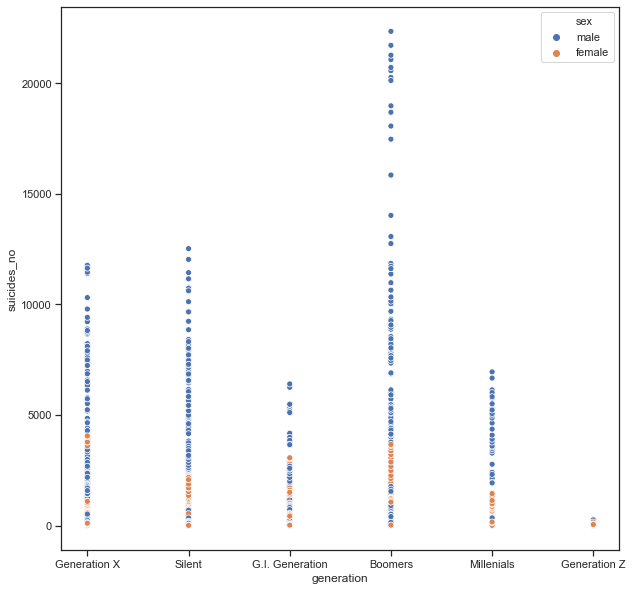

In [57]:
# Построим график, показывающий распределение самоубийств между полами по поколениям
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='generation', y='suicides_no', data=data, hue='sex')

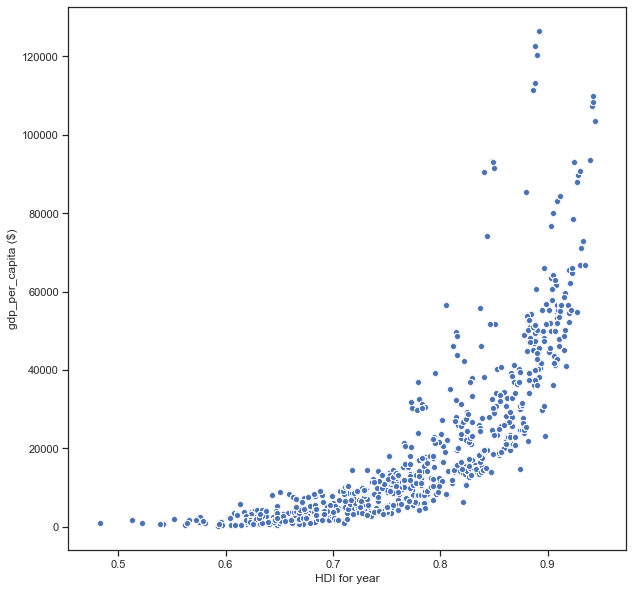

In [58]:
# Построим зависимость ВВП от ИЧР, наблюдается экспоненциальная зависимость
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='HDI for year', y='gdp_per_capita ($)', data=data)

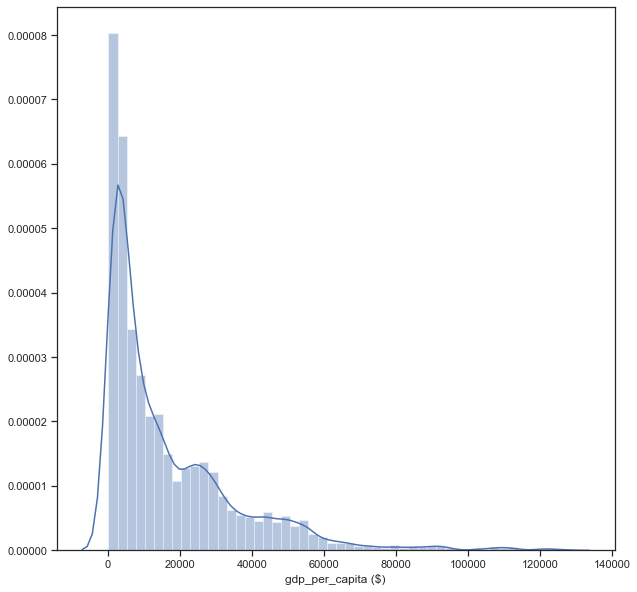

In [59]:
# гистограмма для признака ВВП
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['gdp_per_capita ($)'])

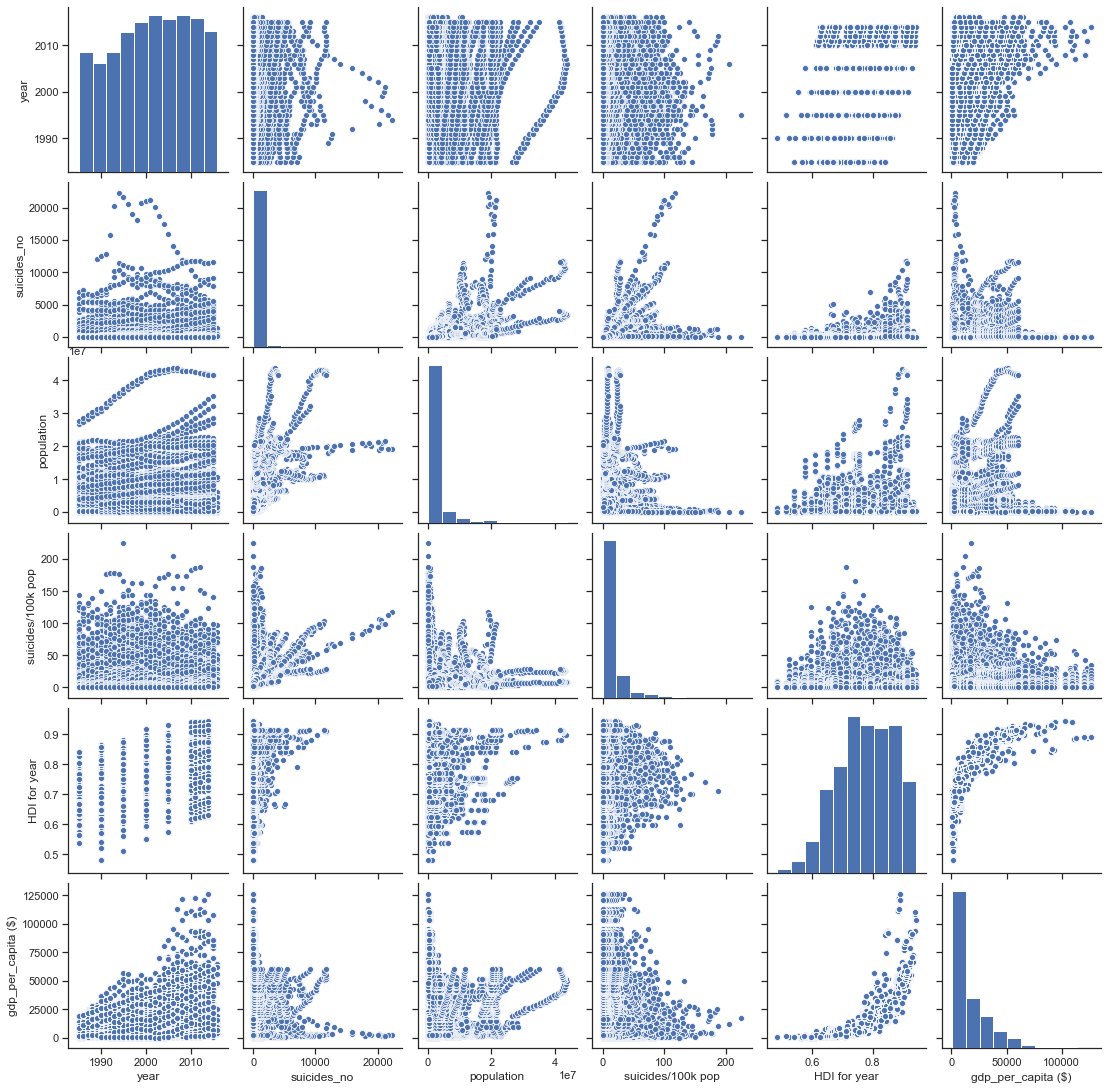

In [60]:
# Комбинация гистограмм и диаграмм рассеивания для всего набора данных.
sns.pairplot(data)

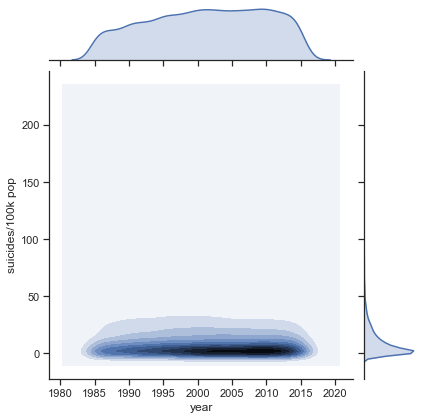

In [61]:
# Комбинация гистограмм и диаграмм рассеивания для признака Число самоубийств на 100 тыс. человек
sns.jointplot(x='year', y='suicides/100k pop', data=data, kind="kde")

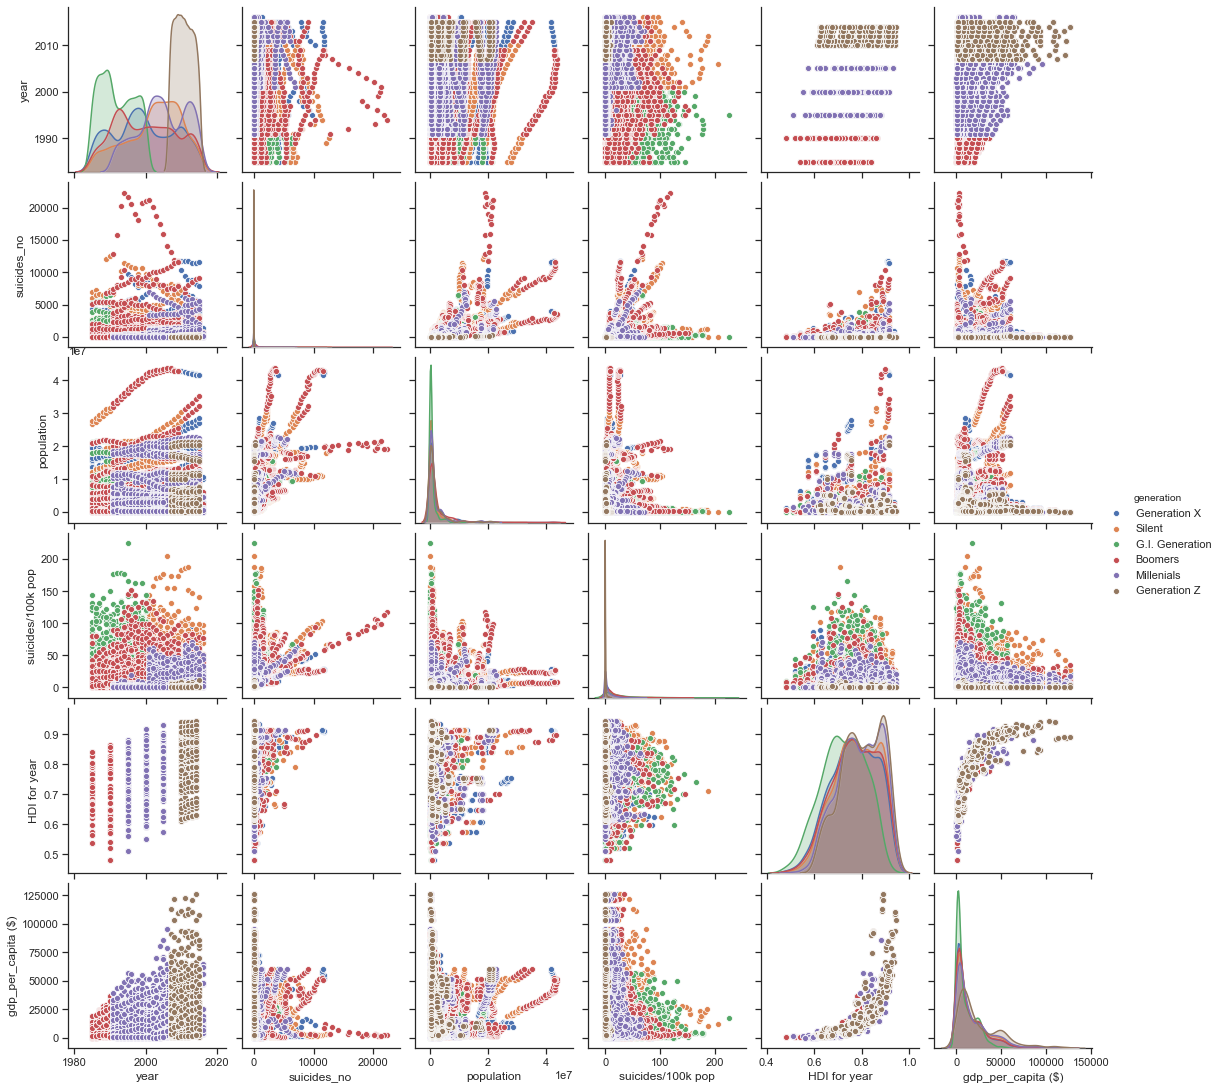

In [62]:
# Комбинация гистограмм и диаграмм рассеивания для всего набора данных с разделением по поколениям
sns.pairplot(data, hue="generation")

In [63]:
data.groupby(['age'])['suicides_no'].agg(suicides=('suicides_no', 'sum'))

,suicides
age,
15-24 years,808542
25-34 years,1123912
35-54 years,2452141
5-14 years,52264
55-74 years,1658443
75+ years,653118


(0, 900)

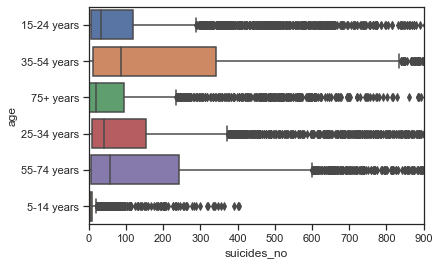

In [64]:
# ящик с усами для признака Количество самоубийств с распределением по возрастным группам
ax = sns.boxplot (x='suicides_no', y='age', data=data)
ax.set_xlim([0, 900])

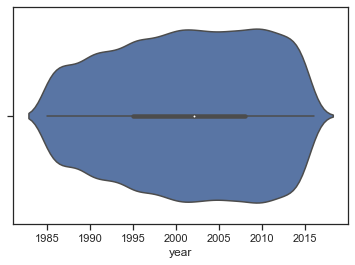

In [65]:
#Распределение плотности целевого признака по годам
sns.violinplot(x=data['year'])

# 3. Информация о корреляции признаков.

In [66]:
# построение корреляционной матрицы для всех признаков
data.corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


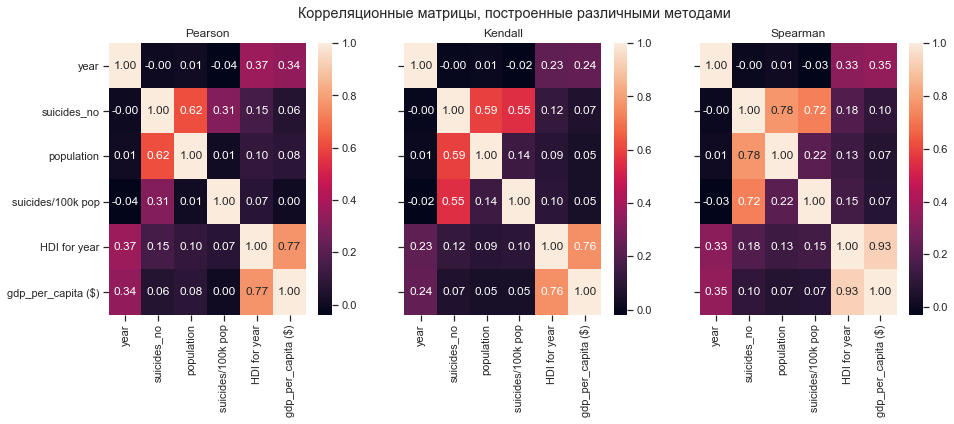

In [67]:
# построение корреляционных матриц методами Пирсона, Кендалла и Спирмена
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

# Выводы
В ходе выполнения лабораторной работы были получены базовые навыки обработки набора данных и построения визуализациии и корреляционных матриц.